# Code to parse through the hand annotated folders to generate the dataframe:
```
import os
##################################
cat_list=['beach_voyeur',
 'exposed_private_parts',
 'upskirt',
 'verifiably_pornographic']
##################################
import pandas as pd
df_list=pd.DataFrame(columns=['wordnet_id','category','file_names'])
##################################
i=0
for root, dirs, files in os.walk("."):
    for filename in files:
        if((root[2:] in cat_list) & (filename.split('.')[-1]=='JPEG')):
            if(filename=='ILSVRC2012_val_00021081.JPEG'):
                list_row=['n03710637',root[2:],filename]
            else:
                list_row=[filename.split('_')[0],root[2:],filename]
            df_list.loc[i,:]=list_row
            i+=1
##################################
# Export the file:
df_imagenet=pd.read_csv('df_census_imagenet_all.csv')
col_list=['wordnet_id', 'label','mean_nsfw_train']
df_filt=df_imagenet.loc[df_imagenet.wordnet_id.isin(list(df_list.wordnet_id.unique())),col_list]
df_filt.reset_index(inplace=True,drop=True)
df_filt_final=df_filt.merge(df_list,on='wordnet_id')
df_filt_final.to_csv('df_hand_survey.csv',index=False)
```

In [1]:
import pandas as pd
df_list=pd.read_csv('df_hand_survey.csv')
df_list.head()

,wordnet_id,category,file_names
0,n03710637,beach_voyeur,ILSVRC2012_val_00021081.JPEG
1,n02837789,beach_voyeur,n02837789_11383.JPEG
2,n02837789,beach_voyeur,n02837789_12451.JPEG
3,n02837789,beach_voyeur,n02837789_13794.JPEG
4,n02837789,beach_voyeur,n02837789_14133.JPEG


In [2]:
df_imagenet=pd.read_csv('df_census_imagenet_61.csv')
col_list=['wordnet_id', 'label','mean_nsfw_train']
df_filt=df_imagenet.loc[df_imagenet.wordnet_id.isin(list(df_list.wordnet_id.unique())),col_list]
df_filt.reset_index(inplace=True,drop=True)
df_filt_final=df_filt.merge(df_list,on='wordnet_id')

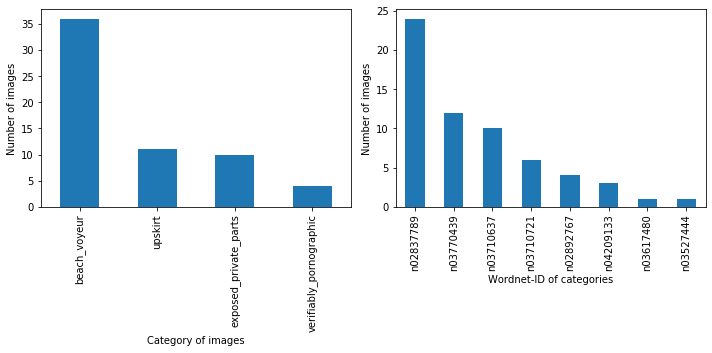

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
df_list.category.value_counts().plot(kind='bar')
plt.xlabel('Category of images')
plt.ylabel('Number of images')
plt.subplot(122)
df_list.wordnet_id.value_counts().plot(kind='bar')
plt.xlabel('Wordnet-ID of categories')
plt.ylabel('Number of images')
plt.tight_layout()
plt.savefig('cnt_hand_survey.pdf',bbox_inches='tight')

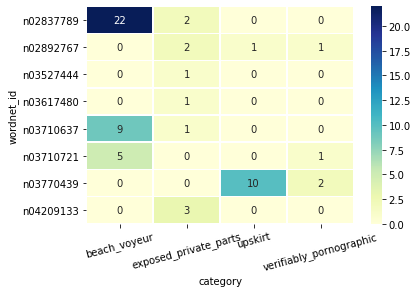

In [4]:
ct=pd.crosstab(df_list.wordnet_id,df_list.category)
import seaborn as sns
ax = sns.heatmap(ct, annot=True, fmt="d",cmap="YlGnBu",linewidths=.5)
plt.xticks(rotation=15)
plt.savefig('ct_hand_survey.pdf',bbox_inches='tight')

In [5]:
import numpy as np
df_filt_final['label_nsfw']=df_filt_final.label.values+'|'+np.round(df_filt_final.mean_nsfw_train,3).astype(str)
df_filt_final.label_nsfw

0     bikini, two-piece|0.859
1     bikini, two-piece|0.859
2     bikini, two-piece|0.859
3     bikini, two-piece|0.859
4     bikini, two-piece|0.859
               ...           
56      miniskirt, mini|0.619
57      miniskirt, mini|0.619
58            shower cap|0.13
59            shower cap|0.13
60            shower cap|0.13
Name: label_nsfw, Length: 61, dtype: object

\begin{tabular}{llrll}
\toprule
wordnet\_id &                    label &  mean\_nsfw\_train &                 category &                    file\_names \\
\midrule
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_11383.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_12451.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_13794.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_14133.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_15158.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_15170.JPEG \\
 n02837789 &        bikini, two-piece &         0.859369 &             beach\_voyeur &          n02837789\_158

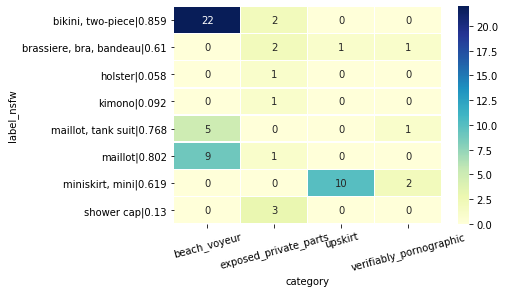

In [6]:
df_filt_final['label_nsfw']=df_filt_final.label.values+'|'+np.round(df_filt_final.mean_nsfw_train,3).astype(str)
ct_2=pd.crosstab(df_filt_final.label_nsfw,df_filt_final.category)
ax = sns.heatmap(ct_2, annot=True, fmt="d",cmap="YlGnBu",linewidths=.5)
plt.xticks(rotation=15)
plt.savefig('crosstab_hand_survey.pdf',bbox_inches='tight')
##########################################################
print(df_filt_final.iloc[:,0:5].to_latex(index=False))  